In [45]:
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers import Input, Dense
import numpy as np

In [46]:
num_of_labels = 200
input_array = [x for x in range(num_of_labels)]

In [47]:
output_array = [(3*x+50) for x in range(num_of_labels)]

In [48]:
randomized_level = 20
noisy_array = []
#Add noise to the output array
for number in output_array:
    number = number + random.uniform(-randomized_level, randomized_level)
    noisy_array.append(number)
    pass

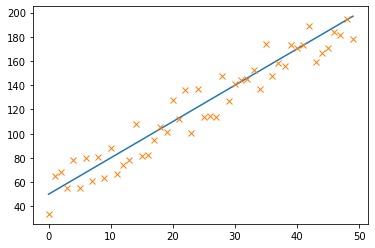

In [49]:
plt.plot(input_array[0: 50], output_array[0:50])
plt.plot(input_array[0: 50], noisy_array[0:50], 'x')
plt.show()

In [50]:
input_layer = Input(shape=(1))
regression_layer = Dense(units = 1)(input_layer)
my_model = tf.keras.Model(inputs = input_layer, outputs=regression_layer)
my_model.summary()


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [51]:
my_model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001), metrics = ['mae'], loss='mae')
input_array = tf.constant(input_array, dtype = 'float32')
noisy_array = tf.constant(noisy_array, dtype = 'float32')
my_model.fit(x = input_array, y = noisy_array, epochs = 100)

Epoch 1/100
7/7 [==============================] - 0s 3ms/step - loss: 231.2268 - mae: 231.2268
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 224.3818 - mae: 224.3818
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 217.4329 - mae: 217.4329
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 210.6216 - mae: 210.6216
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 203.4466 - mae: 203.4466
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 196.2320 - mae: 196.2320
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 189.2058 - mae: 189.2058
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 182.3267 - mae: 182.3267
Epoch 9/100
7/7 [==============================] - 0s 5ms/step - loss: 175.2668 - mae: 175.2668
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 168.6178 - mae: 168.6178
Epoch 11/100
7/7 [=====================

In [52]:
number = 25

test_input = tf.Variable(number, dtype=float)
test_input = tf.expand_dims(test_input, axis=0)
prediction = my_model(test_input)
print(prediction)

tf.Tensor([[83.91161]], shape=(1, 1), dtype=float32)


In [53]:
predictions = [x for x in range(num_of_labels)]
predictions = tf.Variable(predictions, dtype='float32')
predictions = tf.expand_dims(predictions, axis = -1)
print(predictions.shape)

(200, 1)


In [54]:
predictions = my_model(predictions) 

In [55]:
predictions = np.array(predictions)

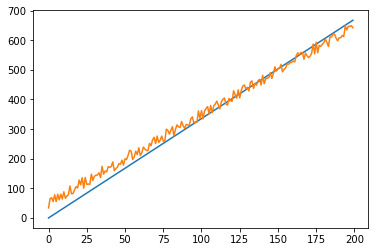

In [56]:
plt.plot(predictions)
plt.plot(noisy_array)
plt.show()